<a href="https://colab.research.google.com/github/CamdenBert/CSCI290/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np



In [47]:
# Load the dataset
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
penguins = pd.read_csv(url)

# Display the first few rows
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [48]:
# Check for missing values
penguins.isnull().sum()

# Drop rows with missing values
penguins.dropna(inplace=True)

# Convert categorical variables to dummy
penguins = pd.get_dummies(penguins, drop_first=True)


penguins.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,False,False,True,True


In [51]:
# Define features and target variable
X = penguins.drop(columns=['species_Gentoo'])  # Drop only the target species column
y = penguins['species_Gentoo']  # Target variable (1 for Gentoo, 0 for others)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Calculate the distances between x and all examples in the training set
        distances = np.linalg.norm(self.X_train - x, axis=1)
        # Get the k nearest samples, their labels, and return the most common label
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return np.bincount(k_nearest_labels).argmax()


In [65]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        print("Training data shape:", self.X_train.shape, "Training labels shape:", self.y_train.shape)

    def predict(self, X):

        X = np.array(X, dtype=float)
        print("Test data shape:", X.shape)
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):

        x = np.array(x, dtype=float).flatten()
        print("Predicting for instance:", x)


        if x.ndim != 1 or x.shape[0] != self.X_train.shape[1]:
            raise ValueError("Input shape does not match training data features.")


        distances = np.linalg.norm(self.X_train - x, axis=1)
        print("Distances:", distances)

        k_indices = np.argsort(distances)[:self.k]
        print("Indices of nearest neighbors:", k_indices)


        k_nearest_labels = self.y_train[k_indices]
        print("Labels of nearest neighbors:", k_nearest_labels)


        most_common = np.bincount(k_nearest_labels).argmax()
        print("Predicted label:", most_common)
        return most_common


In [66]:
k = 3
knn = KNN(k)


In [67]:

knn.fit(X_train.values, y_train.values)


Training data shape: (266, 9) Training labels shape: (266,)


In [71]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [72]:

X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (80, 5)
Testing data shape: (20, 5)


In [73]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        print("Training data shape:", self.X_train.shape, "Training labels shape:", self.y_train.shape)

    def predict(self, X):
        X = np.array(X, dtype=float)
        print("Test data shape:", X.shape)
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        x = np.array(x, dtype=float).flatten()
        print("Predicting for instance:", x)

        if x.ndim != 1 or x.shape[0] != self.X_train.shape[1]:
            raise ValueError("Input shape does not match training data features.")

        distances = np.linalg.norm(self.X_train - x, axis=1)
        print("Distances:", distances)

        k_indices = np.argsort(distances)[:self.k]
        print("Indices of nearest neighbors:", k_indices)

        k_nearest_labels = self.y_train[k_indices]
        print("Labels of nearest neighbors:", k_nearest_labels)

        most_common = np.bincount(k_nearest_labels).argmax()
        print("Predicted label:", most_common)
        return most_common


In [74]:
k = 3
knn = KNN(k)


In [75]:
knn.fit(X_train, y_train)


Training data shape: (80, 5) Training labels shape: (80,)


In [76]:
predictions = knn.predict(X_test)
print("Predictions:", predictions)


Test data shape: (20, 5)
Predicting for instance: [ 0.1094067   0.30759353  0.01722979 -0.38566776 -0.71530371]
Distances: [1.4513467  2.24130062 1.82261138 2.9154955  3.65019693 2.30638991
 1.90112811 2.79418935 2.65667079 2.87133856 2.17799721 4.44046251
 2.02488315 1.70149762 2.76858746 2.54110629 2.57258802 3.21124763
 2.62801405 2.49691095 2.23041677 2.34379093 3.15652526 1.8074302
 2.29592295 1.49722788 2.08731167 2.35714965 2.83995406 1.57982649
 1.57820814 2.73550282 2.78056725 3.46023507 2.33374025 1.99473885
 1.70073255 3.72193507 2.2124183  2.4961363  2.1524848  2.61467112
 2.46604413 2.41736822 3.15466104 3.88053212 2.94001081 2.61289679
 2.67872632 2.63749555 2.76557078 2.16242252 2.36353801 3.37161777
 3.60942972 3.62180478 1.11635461 0.90415492 2.35145357 3.20788794
 1.80746465 3.21474036 2.62777051 2.72939733 2.24150672 2.9727562
 3.36314593 1.59088874 2.25841525 2.57537426 3.73077343 0.58187751
 2.75288874 2.68043995 3.46438064 1.28794983 3.13860266 1.88574334
 2.55734

In [77]:
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


Accuracy: 1.00


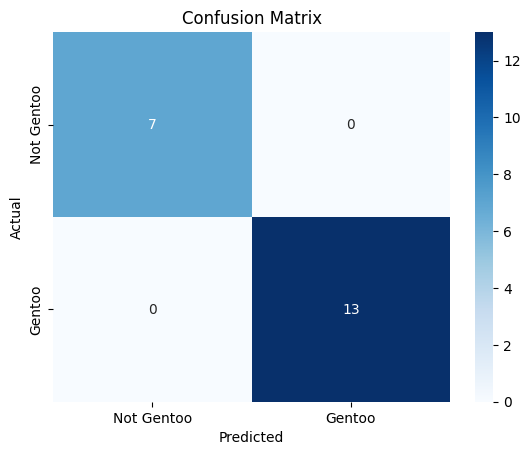

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [79]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Gentoo', 'Gentoo'], yticklabels=['Not Gentoo', 'Gentoo'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, predictions))


In [81]:
import matplotlib.pyplot as plt


Training data shape: (80, 5)
Testing data shape: (20, 5)
Training data shape: (80, 5) Training labels shape: (80,)
Test data shape: (20, 5)
Predicting for instance: [ 0.1094067   0.30759353  0.01722979 -0.38566776 -0.71530371]
Distances: [1.4513467  2.24130062 1.82261138 2.9154955  3.65019693 2.30638991
 1.90112811 2.79418935 2.65667079 2.87133856 2.17799721 4.44046251
 2.02488315 1.70149762 2.76858746 2.54110629 2.57258802 3.21124763
 2.62801405 2.49691095 2.23041677 2.34379093 3.15652526 1.8074302
 2.29592295 1.49722788 2.08731167 2.35714965 2.83995406 1.57982649
 1.57820814 2.73550282 2.78056725 3.46023507 2.33374025 1.99473885
 1.70073255 3.72193507 2.2124183  2.4961363  2.1524848  2.61467112
 2.46604413 2.41736822 3.15466104 3.88053212 2.94001081 2.61289679
 2.67872632 2.63749555 2.76557078 2.16242252 2.36353801 3.37161777
 3.60942972 3.62180478 1.11635461 0.90415492 2.35145357 3.20788794
 1.80746465 3.21474036 2.62777051 2.72939733 2.24150672 2.9727562
 3.36314593 1.59088874 2.25

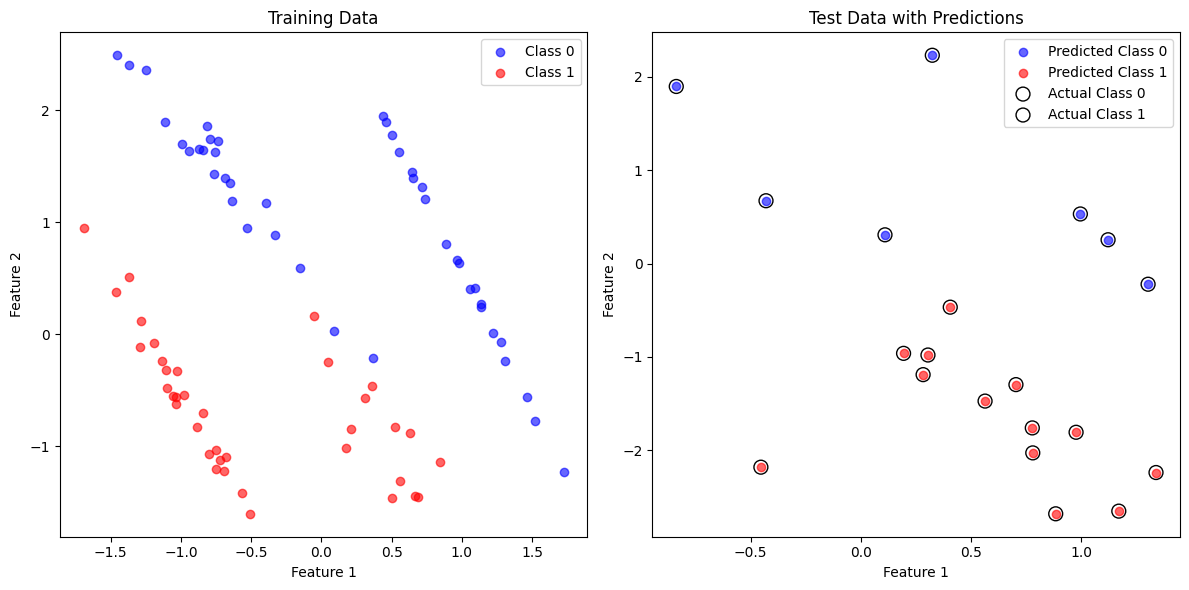

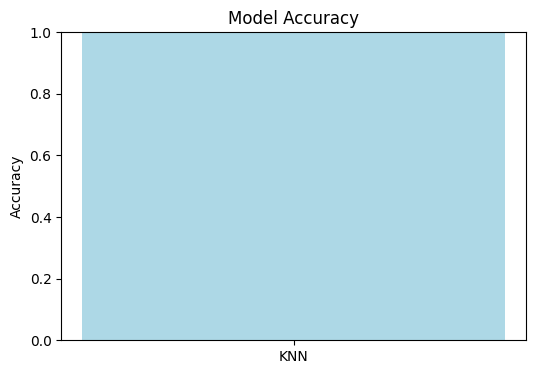

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        print("Training data shape:", self.X_train.shape, "Training labels shape:", self.y_train.shape)

    def predict(self, X):
        X = np.array(X, dtype=float)
        print("Test data shape:", X.shape)
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        x = np.array(x, dtype=float).flatten()
        print("Predicting for instance:", x)

        if x.ndim != 1 or x.shape[0] != self.X_train.shape[1]:
            raise ValueError("Input shape does not match training data features.")

        distances = np.linalg.norm(self.X_train - x, axis=1)
        print("Distances:", distances)

        k_indices = np.argsort(distances)[:self.k]
        print("Indices of nearest neighbors:", k_indices)

        k_nearest_labels = self.y_train[k_indices]
        print("Labels of nearest neighbors:", k_nearest_labels)

        most_common = np.bincount(k_nearest_labels).argmax()
        print("Predicted label:", most_common)
        return most_common


k = 3
knn = KNN(k)


knn.fit(X_train, y_train)


predictions = knn.predict(X_test)
print("Predictions:", predictions)


accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


plt.figure(figsize=(12, 6))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1', alpha=0.6)
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[predictions == 0][:, 0], X_test[predictions == 0][:, 1], color='blue', label='Predicted Class 0', alpha=0.6)
plt.scatter(X_test[predictions == 1][:, 0], X_test[predictions == 1][:, 1], color='red', label='Predicted Class 1', alpha=0.6)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], edgecolor='black', facecolor='none', label='Actual Class 0', s=100)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], edgecolor='black', facecolor='none', label='Actual Class 1', s=100)
plt.title('Test Data with Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
plt.bar(['KNN'], [accuracy], color='lightblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()


Error in creating dataset: Number of informative, redundant and repeated features must sum to less than the number of total features
Data split into training and test sets successfully.
Accuracy: 1.0


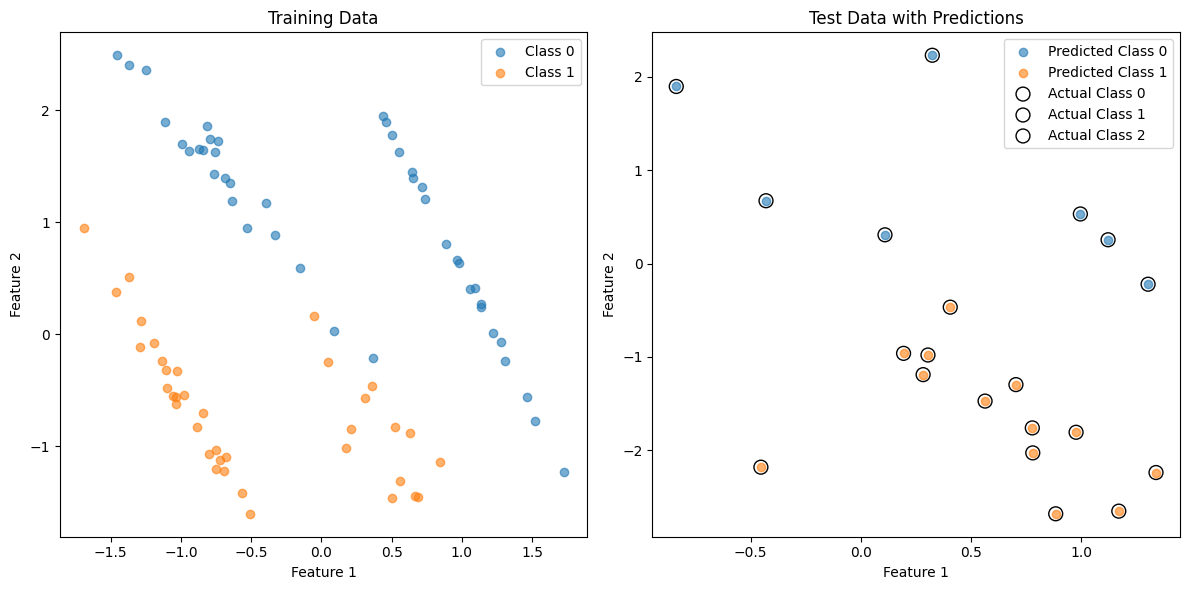

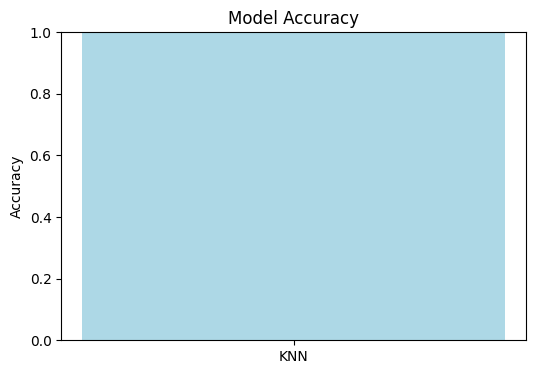

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Step 1: Create a synthetic dataset with three classes
try:
    X, y = make_classification(n_samples=150, n_features=2, n_classes=3,
                               n_clusters_per_class=1, random_state=42)
    print("Dataset created successfully.")
except Exception as e:
    print("Error in creating dataset:", e)

# Split the dataset into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data split into training and test sets successfully.")
except Exception as e:
    print("Error in splitting dataset:", e)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        X = np.array(X, dtype=float)
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        x = np.array(x, dtype=float).flatten()
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Instantiate the KNN classifier
k = 3
knn = KNN(k)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Evaluate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

# Step 3: Visualization
plt.figure(figsize=(12, 6))

# Training data
plt.subplot(1, 2, 1)
for class_label in np.unique(y_train):
    plt.scatter(X_train[y_train == class_label][:, 0], X_train[y_train == class_label][:, 1],
                label=f'Class {class_label}', alpha=0.6)
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Test data with predictions
plt.subplot(1, 2, 2)
for class_label in np.unique(predictions):
    plt.scatter(X_test[predictions == class_label][:, 0], X_test[predictions == class_label][:, 1],
                label=f'Predicted Class {class_label}', alpha=0.6)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], edgecolor='black', facecolor='none', label='Actual Class 0', s=100)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], edgecolor='black', facecolor='none', label='Actual Class 1', s=100)
plt.scatter(X_test[y_test == 2][:, 0], X_test[y_test == 2][:, 1], edgecolor='black', facecolor='none', label='Actual Class 2', s=100)
plt.title('Test Data with Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Accuracy bar plot
plt.figure(figsize=(6, 4))
plt.bar(['KNN'], [accuracy], color='lightblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()


In [89]:
pip install pandas seaborn scikit-learn


In [90]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/allisonhorst/penguins/master/inst/extdata/penguins.csv"
penguins = pd.read_csv(url)


penguins.dropna(inplace=True)

# Convert species to binary (Adelie vs. others)
penguins['species_binary'] = penguins['species'].apply(lambda x: 1 if x == 'Adelie' else 0)

# Features and labels
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species_binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Performance:
Accuracy: 0.9850746268656716

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      1.00      0.98        31

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

Confusion Matrix:
 [[35  1]
 [ 0 31]]


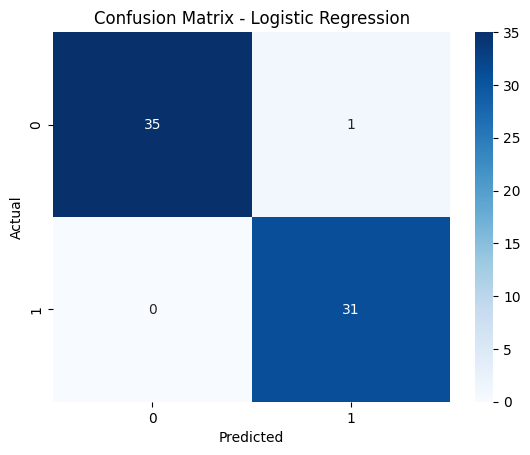

In [92]:

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


y_pred_log_reg = log_reg.predict(X_test_scaled)


print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Support Vector Machine Performance:
Accuracy: 0.9701492537313433

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.94      1.00      0.97        31

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67

Confusion Matrix:
 [[34  2]
 [ 0 31]]


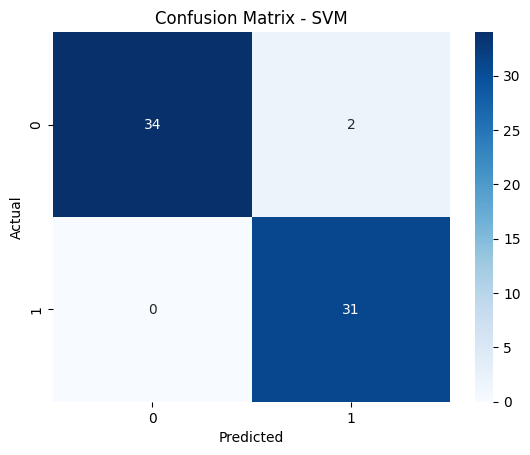

In [93]:

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)


y_pred_svm = svm_model.predict(X_test_scaled)


print("Support Vector Machine Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [97]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/allisonhorst/penguins/master/inst/extdata/penguins.csv"
penguins = pd.read_csv(url)


penguins.dropna(inplace=True)


X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Softmax Regression Performance:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        31

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
 [[36  0]
 [ 0 31]]


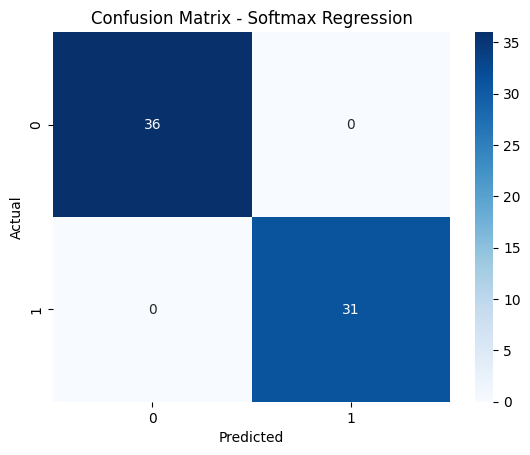

In [95]:

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(X_train_scaled, y_train)


y_pred_softmax = softmax_reg.predict(X_test_scaled)


print("Softmax Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_softmax))
print("\nClassification Report:\n", classification_report(y_test, y_pred_softmax))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_softmax))


sns.heatmap(confusion_matrix(y_test, y_pred_softmax), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Softmax Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Softmax Regression Performance:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
 [[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]


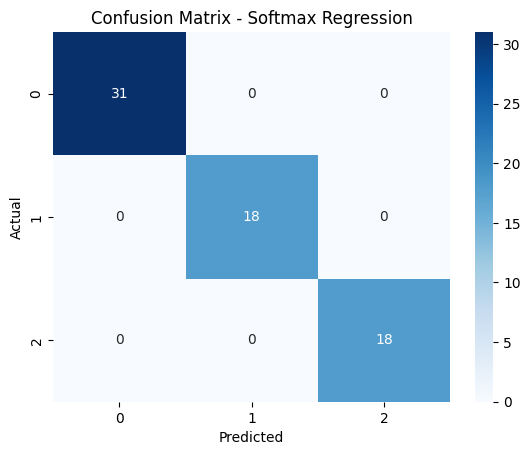

In [101]:

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(X_train_scaled, y_train)


y_pred_softmax = softmax_reg.predict(X_test_scaled)


print("Softmax Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_softmax))
print("\nClassification Report:\n", classification_report(y_test, y_pred_softmax))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_softmax))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_softmax), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Softmax Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [104]:
sgd_classifier = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)
from sklearn.linear_model import SGDClassifier



Stochastic Gradient Descent Classifier Performance:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
 [[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]


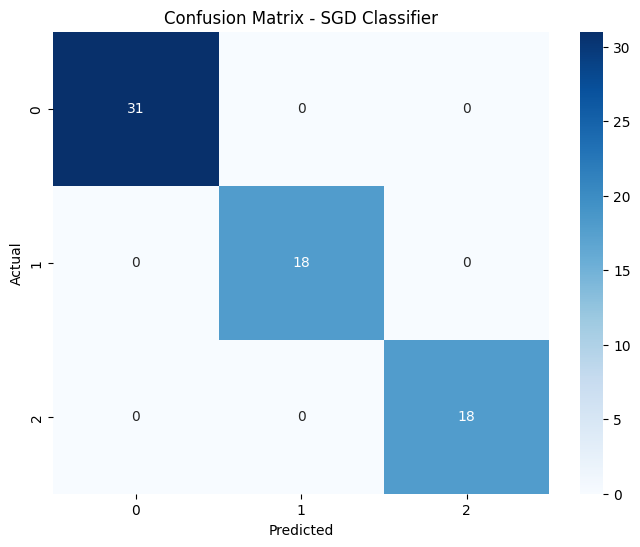

In [106]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


sgd_classifier = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
sgd_classifier.fit(X_train_scaled, y_train)


y_pred_sgd = sgd_classifier.predict(X_test_scaled)


print("Stochastic Gradient Descent Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sgd))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_sgd), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SGD Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
